<h1> 2. Modelo ARIMA(p,d,q) </h1>

<h2> Preprocesamiento de Datos </h2>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt #Gráficas de autocorrelación 
import statsmodels.tsa.stattools as sts #Para prueba de Dickey-Fuller
import seaborn as sns 
import warnings  #Para ignorar los errores en jupyternotebook
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from datetime import datetime #Para trabajar con fechas
import os #Para poner la dirección donde esta la base de datos.
sns.set()
os.chdir("C:\\Users\\81799\\OneDrive\\Documentos\\ESFM_CLASES\\Servicio Social ARTF\\Machine Learning\\section1\\ARTF_2017_2020\\ABRIL_ARTF\\Toneladas_netas")

In [2]:
Maiz = pd.read_csv("Maiz_Serie_de_Tiempo.csv")#Leer la serie de tiempo Maiz
del Maiz["Unnamed: 0"] #Eliminamos la primera columna
Maiz.set_index("Fechas",inplace = True) # Ponemos las fechas como índices
Maiz # Imprimimos los datos para verificar que estedn correctos.

,Maiz
Fechas,
01/2014,1.037734e+06
02/2014,8.419366e+05
03/2014,9.688675e+05
04/2014,1.061895e+06
05/2014,1.046361e+06
...,...
10/2021,1.343688e+06
11/2021,1.540362e+06
12/2021,1.454104e+06


<h2> Gráfica $ACF$ </h2>

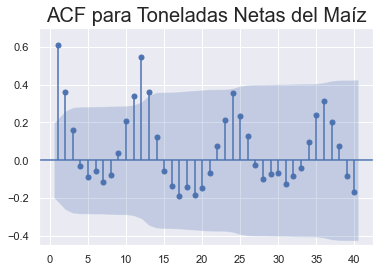

In [3]:
sgt.plot_acf(Maiz["Maiz"], zero = False, lags = 40)
plt.title("ACF para Toneladas Netas del Maíz", size = 20)
plt.ylim(-0.45,0.7)
plt.show()

Para esta gráfica tendríamos que el modelo $MA(q)$ no contenga más de $2$ componentes, porque observamos que $\varphi _2$ es significativo y los demás componentes ($\varphi _3,\ldots ,\varphi _{10}$) NO son significativos, ya que están dentro de la franja.

<h2> Gráfica $PACF$ </h2>

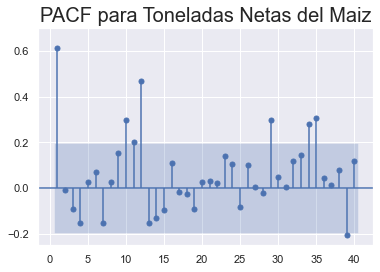

In [4]:
sgt.plot_pacf(Maiz["Maiz"], zero = False, lags = 40, alpha =0.05, method = ("ols"))
plt.title("PACF para Toneladas Netas del Maiz", size = 20)
plt.ylim(-.25,0.7)
plt.show()

Para esta gráfica tendríamos que el modelo $AR(p)$ no contenga más de $1$ retraso, porque observamos que $\varphi _1$ es significativo y los demás componentes ($\varphi _2,\ldots ,\varphi _{9}$) NO son significativos, ya que están dentro de la franja.

Como la serie es estacionaria, entonces sería "lógico" proponer un modelo $ARMA(2,1)$, el cual se expresaría de la siguiente manera: $$x_t=c+\Phi _1x_{t-1}+\Phi _2x_{t-2}+\theta _1 \varepsilon _{t-1}+\varepsilon _t$$. 

Para saber que modelo es óptimo, tendremos que: 


* Obtener un **modelo parametrizado.**

En el anterior modelo estamos tomando la combinación de los dos modelo dos$ AR(p)$ y $MA(q)$, entonces se tiene que obtener un **sobreparametrizar**, con la finalidad de obtener un **MODELO SOBREPARAMETRIZADO**.

Una propuesta de dicho modelo es: $ARMA(1,1)=ARIMA(1,0,1)$

* Los modelos siguientes a considerar serán caracterizados por una disminución del número de componentes, es decir, se disminuye hasta el más simple

Compararemos el modelo parametrizado con los siguientes modelos: 
* $ARIMA(1,0,0)$
* $ARIMA(0,0,1)$


Para que un modelo sea adecuado, tendrá que cumplir lo siguiente:
1. Que **TODOS** los coeficientes significativos.
2. Que un valor grande en **Log-verosimilitud**.
3. Realizar los *Criterios de Información* (AIC o BIC).


<h2> Prueba de Razón Log-Verosimilitud (LikeLihood). </h2>

* $H_0:$ Los dos modelos son significativamente **iguales.**
* $H_a:$ Los dos modelos son significativamente **diferentes.**


In [7]:
def LLR(mod_1,mod_2,DF=1): #DF son los grados de libertad
    L1=mod_1.llf # Me da Log Likelihood del mod_1 que de como entrada
    L2=mod_2.llf # Me da Log Likelihood del mod_2 que de como entrada
    LR=(2*(L2-L1)) # Estadístico de prueba
    p=chi2.sf(LR,DF).round(3) #P-valor
    return p

Función para poder decisión de **Prueba de Razón Log-Verosimilitud (LikeLihood).**

In [38]:
def Decision_LLRA(p_valor):
    if p_valor<0.05:
        d=f"Como {p_valor}<0.05, entonces los dos modelos son significativamente diferentes."
    else :
        d=f"Como {p_valor}>0.05, entonces los dos modelos son significativamente iguales"
    return d

Función para Decidir cual de los modelos tiene mayor **Log Likelihood** y menor **AIC**

In [43]:
def Decision_LL(LL1,LL2):
    if LL1>LL2:
        d=LL1
    else :
        d=LL2
    return d

In [45]:
def Decision_AIC(AIC1,AIC2):
    if AIC1<AIC2:
        d=AIC1
    else :
        d=AIC2
    return d

3

<h3> $ARMA(1,1)$ vs $ARMA(1,0)$ </h3>

In [14]:
modelo_AR_1_MA_1 = ARIMA(Maiz, order = (1,0,1)) # ARMA(1,1)
resultados_modelo_AR_1_MA_1 = modelo_AR_1_MA_1.fit() #ARMA(1,1) ajustados
modelo_AR_1_MA_0 = ARIMA(Maiz, order = (1,0,0)) #ARMA(1,0)
resultados_modelo_AR_1_MA_0 = modelo_AR_1_MA_0.fit() #ARMA(1,0) ajustados
print(f"{resultados_modelo_AR_1_MA_1.summary()}")
p_valor_LLR=LLR(resultados_modelo_AR_1_MA_0,resultados_modelo_AR_1_MA_1)
print(f"LLR={p_valor_LLR_test}")

                               SARIMAX Results                                
Dep. Variable:                   Maiz   No. Observations:                   98
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1321.064
Date:                Wed, 25 May 2022   AIC                           2650.129
Time:                        22:36:17   BIC                           2660.469
Sample:                    01-01-2014   HQIC                          2654.311
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.297e+06   4.41e+04     29.414      0.000    1.21e+06    1.38e+06
ar.L1          0.6069      0.160      3.801      0.000       0.294       0.920
ma.L1          0.0129      0.174      0.074      0.9

In [33]:
Decision_LLRA(p_valor_LLR)

'Como 0.935>0.05, entonces los dos modelos son significativamente iguales'

**Conclusión:** Me quedó con el modelo $ARMA(1,0)$ ya que es el más simple.

$ARMA(1,0)$ vs $ARMA(0,1)$

En este caso no se puede realizar **la prueba de razón Log-LikeLihood**, ya que esta prueba solo funciona para **Modelos Anidados**, entonces compararemos cual de los dos modelos tiene mayor **Log-Likelihood** y menor **AIC**, quién cumpla lo anterior es el mejor modelo.

In [54]:
modelo_AR_0_MA_1 = ARIMA(Maiz, order = (0,0,1)) # ARMA(0,1)
resultados_modelo_AR_0_MA_1 = modelo_AR_0_MA_1.fit() #ARMA(0,1) ajustados
LL=Decision_LL(resultados_modelo_AR_1_MA_0.llf,resultados_modelo_AR_0_MA_1.llf)
AIC=Decision_AIC(resultados_modelo_AR_1_MA_0.aic,resultados_modelo_AR_0_MA_1.aic)
print(f" ARMA(1,0): \t LL ={resultados_modelo_AR_1_MA_0.llf} \t AIC ={resultados_modelo_AR_1_MA_0.aic} ")
print(f" ARMA(1,0): \t LL ={resultados_modelo_AR_0_MA_1.llf} \t AIC ={resultados_modelo_AR_0_MA_1.aic} ")
print(f"\n Mayor LL ={LL} \t Menor AIC ={AIC}")

 ARMA(1,0): 	 LL =-1321.0677003913604 	 AIC =2648.135400782721 
 ARMA(1,0): 	 LL =-1327.236381491108 	 AIC =2660.472762982216 

 Mayor LL =-1321.0677003913604 	 Menor AIC =2648.135400782721


Con lo anterior, nos quedamos con el modelo $ARMA(1,0)$